In [66]:
import pandas as pd
import geopandas as gpd
import folium

Read and view tracts data, select important variables

In [67]:
tracts = gpd.read_file("tl_2020_06_tract.dbf")
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,004402,06029004402,44.02,Census Tract 44.02,G5020,S,1865739,0,+35.5917343,-119.3337642,None
1,06,047,000802,06047000802,8.02,Census Tract 8.02,G5020,S,2321653,0,+37.3433591,-120.5854604,None
2,06,085,501402,06085501402,5014.02,Census Tract 5014.02,G5020,S,522620,0,+37.3453341,-121.8665169,None
3,06,005,000102,06005000102,1.02,Census Tract 1.02,G5020,S,456204155,7940832,+38.5496993,-120.2509786,None
4,06,029,004901,06029004901,49.01,Census Tract 49.01,G5020,S,1459379,0,+35.7837173,-119.2462266,None


In [68]:
tracts = tracts[['NAME', 'INTPTLAT', 'INTPTLON']]

In [69]:
tracts.head()

,NAME,INTPTLAT,INTPTLON
0,44.02,+35.5917343,-119.3337642
1,8.02,+37.3433591,-120.5854604
2,5014.02,+37.3453341,-121.8665169
3,1.02,+38.5496993,-120.2509786
4,49.01,+35.7837173,-119.2462266


Read ACS data, create function to extract tract number with regex

In [70]:
acs = gpd.read_file("ACSDP5Y2022.DP05-Data.csv")

In [71]:
acs.head()

import re

def extract_census_tract(text):
    match = re.search(r'\b\d{4}\.\d{2}\b', text)
    return match.group(0) if match else None

acs['NAME'] = acs['NAME'].apply(extract_census_tract)

In [72]:
acs.head()

,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,DP05_0005E,...,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,DP05_0090PE,DP05_0090PM,DP05_0091PE,DP05_0091PM,geometry
0,None,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Under...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",None
1,1011.10,4014,473,1905,265,2109,326,90.3,16.1,141,...,2.8,(X),(X),3106,(X),46.5,4.3,53.5,4.3,None
2,1011.22,4164,822,2098,449,2066,432,101.5,15.5,128,...,2.8,(X),(X),3252,(X),52.4,3.9,47.6,3.9,None
3,1012.20,3481,467,1651,266,1830,282,90.2,15,135,...,1.1,(X),(X),2459,(X),46.8,5.8,53.2,5.8,None
4,1012.21,3756,687,1966,427,1790,382,109.8,24.7,154,...,1.9,(X),(X),2224,(X),54.9,8.4,45.1,8.4,None


In [73]:
tracts.head()

,NAME,INTPTLAT,INTPTLON
0,44.02,+35.5917343,-119.3337642
1,8.02,+37.3433591,-120.5854604
2,5014.02,+37.3453341,-121.8665169
3,1.02,+38.5496993,-120.2509786
4,49.01,+35.7837173,-119.2462266


Left-join the data (keep all observations in joined) by common variable NAME

In [74]:
joined = acs.merge(tracts, on='NAME', how='left')
joined.head()

,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,DP05_0005E,...,DP05_0088PM,DP05_0089PE,DP05_0089PM,DP05_0090PE,DP05_0090PM,DP05_0091PE,DP05_0091PM,geometry,INTPTLAT,INTPTLON
0,None,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Under...,...,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",None,NaN,NaN
1,1011.10,4014,473,1905,265,2109,326,90.3,16.1,141,...,(X),3106,(X),46.5,4.3,53.5,4.3,None,+34.2594737,-118.2929869
2,1011.22,4164,822,2098,449,2066,432,101.5,15.5,128,...,(X),3252,(X),52.4,3.9,47.6,3.9,None,+34.2677213,-118.2901465
3,1012.20,3481,467,1651,266,1830,282,90.2,15,135,...,(X),2459,(X),46.8,5.8,53.2,5.8,None,+34.2516083,-118.2816328
4,1012.21,3756,687,1966,427,1790,382,109.8,24.7,154,...,(X),2224,(X),54.9,8.4,45.1,8.4,None,+34.2543290,-118.2925767


Create geometry column from lon and lat columns

In [75]:
from shapely.geometry import Point

joined['geometry'] = joined.apply(lambda row: Point(row['INTPTLON'], row['INTPTLAT']), axis=1)
gdf = gpd.GeoDataFrame(joined, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,DP05_0005E,...,DP05_0088PM,DP05_0089PE,DP05_0089PM,DP05_0090PE,DP05_0090PM,DP05_0091PE,DP05_0091PM,geometry,INTPTLAT,INTPTLON
0,None,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Under...,...,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",POINT EMPTY,NaN,NaN
1,1011.10,4014,473,1905,265,2109,326,90.3,16.1,141,...,(X),3106,(X),46.5,4.3,53.5,4.3,POINT (-118.29299 34.25947),+34.2594737,-118.2929869
2,1011.22,4164,822,2098,449,2066,432,101.5,15.5,128,...,(X),3252,(X),52.4,3.9,47.6,3.9,POINT (-118.29015 34.26772),+34.2677213,-118.2901465
3,1012.20,3481,467,1651,266,1830,282,90.2,15,135,...,(X),2459,(X),46.8,5.8,53.2,5.8,POINT (-118.28163 34.25161),+34.2516083,-118.2816328
4,1012.21,3756,687,1966,427,1790,382,109.8,24.7,154,...,(X),2224,(X),54.9,8.4,45.1,8.4,POINT (-118.29258 34.25433),+34.2543290,-118.2925767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,9800.38,0,13,0,13,0,13,-,**,0,...,(X),0,(X),-,**,-,**,POINT (-118.37550 34.00107),+34.0010705,-118.3754970
2553,9800.39,0,13,0,13,0,13,-,**,0,...,(X),0,(X),-,**,-,**,POINT (-118.35086 34.13874),+34.1387351,-118.3508573
2554,None,0,13,0,13,0,13,-,**,0,...,(X),0,(X),-,**,-,**,POINT EMPTY,NaN,NaN
2555,None,0,13,0,13,0,13,-,**,0,...,(X),0,(X),-,**,-,**,POINT EMPTY,NaN,NaN


In [76]:
gdf.head()

,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,DP05_0005E,...,DP05_0088PM,DP05_0089PE,DP05_0089PM,DP05_0090PE,DP05_0090PM,DP05_0091PE,DP05_0091PM,geometry,INTPTLAT,INTPTLON
0,None,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Under...,...,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",POINT EMPTY,NaN,NaN
1,1011.10,4014,473,1905,265,2109,326,90.3,16.1,141,...,(X),3106,(X),46.5,4.3,53.5,4.3,POINT (-118.29299 34.25947),+34.2594737,-118.2929869
2,1011.22,4164,822,2098,449,2066,432,101.5,15.5,128,...,(X),3252,(X),52.4,3.9,47.6,3.9,POINT (-118.29015 34.26772),+34.2677213,-118.2901465
3,1012.20,3481,467,1651,266,1830,282,90.2,15,135,...,(X),2459,(X),46.8,5.8,53.2,5.8,POINT (-118.28163 34.25161),+34.2516083,-118.2816328
4,1012.21,3756,687,1966,427,1790,382,109.8,24.7,154,...,(X),2224,(X),54.9,8.4,45.1,8.4,POINT (-118.29258 34.25433),+34.2543290,-118.2925767


Rename columns to first row observations, drop first row

In [77]:
first_col = gdf.columns[0]
last_three_cols = gdf.columns[-3:]

new_column_names = {gdf.columns[i]: gdf.iloc[0, i] for i in range(1, len(gdf.columns) - 3)}
gdf = gdf.rename(columns=new_column_names)

# Restore the original names for the first and last three columns
gdf.columns = [first_col] + list(gdf.columns[1:-3]) + list(last_three_cols)

# Drop the first row
gdf = gdf.drop(gdf.index[0])

# Reset the index if needed
gdf = gdf.reset_index(drop=True)

In [78]:
gdf.head()

,NAME,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!Under 5 years,...,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",geometry,INTPTLAT,INTPTLON
0,1011.10,4014,473,1905,265,2109,326,90.3,16.1,141,...,(X),3106,(X),46.5,4.3,53.5,4.3,POINT (-118.29299 34.25947),+34.2594737,-118.2929869
1,1011.22,4164,822,2098,449,2066,432,101.5,15.5,128,...,(X),3252,(X),52.4,3.9,47.6,3.9,POINT (-118.29015 34.26772),+34.2677213,-118.2901465
2,1012.20,3481,467,1651,266,1830,282,90.2,15,135,...,(X),2459,(X),46.8,5.8,53.2,5.8,POINT (-118.28163 34.25161),+34.2516083,-118.2816328
3,1012.21,3756,687,1966,427,1790,382,109.8,24.7,154,...,(X),2224,(X),54.9,8.4,45.1,8.4,POINT (-118.29258 34.25433),+34.2543290,-118.2925767
4,1012.22,2808,424,1266,234,1542,267,82.1,15.6,28,...,(X),1552,(X),45,7.3,55,7.3,POINT (-118.28853 34.25135),+34.2513519,-118.2885261


Drop columns that I am not currently interested in

In [79]:
columns_to_drop = [col for col in gdf.columns if col.startswith('Margin of Error')]
gdf = gdf.drop(columns=columns_to_drop)
columns_to_drop = [col for col in gdf.columns if col.startswith('Estimate')]
gdf = gdf.drop(columns=columns_to_drop)
columns_to_drop = [col for col in gdf.columns if col.startswith('Percent Margin')]
gdf = gdf.drop(columns=columns_to_drop)

Folium map with a point for every tract

In [115]:
import folium

gdf_trim = gdf.dropna()

m = folium.Map()

for index, row in gdf_trim.iterrows():
    tooltip_text = 'Census Tract ' + str(row['NAME'])
    folium.Marker(
        [row.INTPTLAT,row.INTPTLON], 
        tooltip=tooltip_text,
    ).add_to(m)
    
m

Basic plots making sure the variables work after coercing to numeric

In [116]:
col_indices = range(1, len(gdf_trim.columns) - 3)

for i in col_indices:
    if isinstance(gdf_trim.iloc[:, i], pd.Series):
        gdf_trim.iloc[:, i] = pd.to_numeric(gdf_trim.iloc[:, i], errors='coerce')

<Axes: >

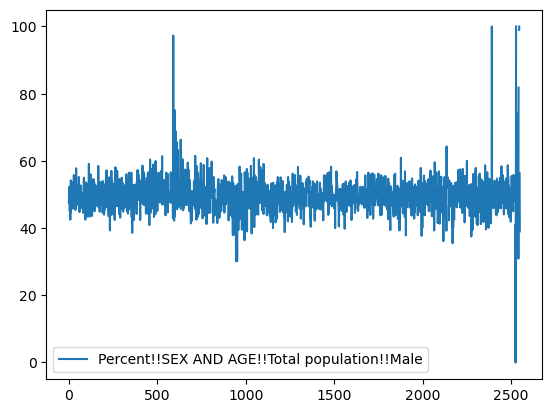

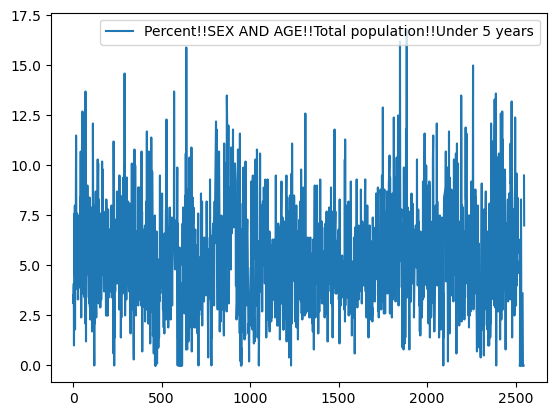

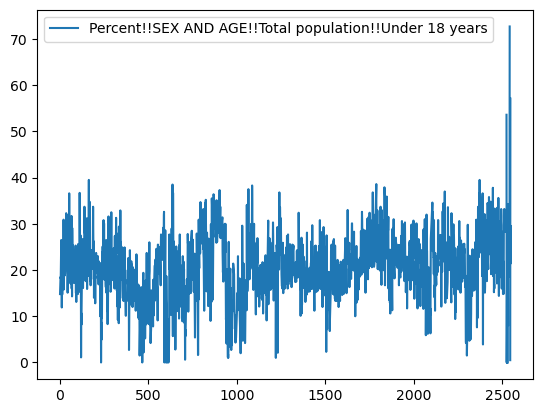

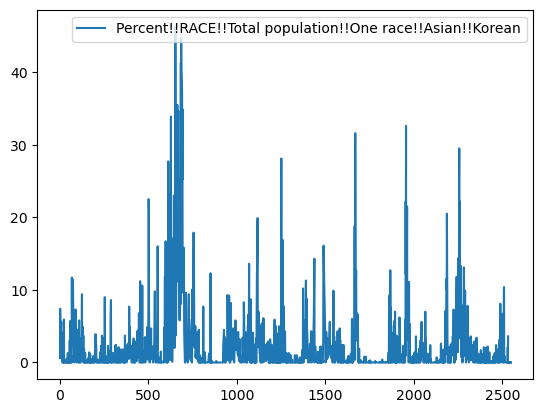

In [120]:
gdf_trim[["Percent!!SEX AND AGE!!Total population!!Male"]].plot()
gdf_trim[["Percent!!SEX AND AGE!!Total population!!Under 5 years"]].plot()
gdf_trim[["Percent!!SEX AND AGE!!Total population!!Under 18 years"]].plot()
gdf_trim[["Percent!!RACE!!Total population!!One race!!Asian!!Korean"]].plot()